In [2]:
import pandas as pd
import numpy as np

pumpkins = pd.read_csv("C:\\ML_for_Beginners\\ML-For-Beginners\\2-Regression\\data\\US-pumpkins.csv")
print(pumpkins.head())

   City Name Type       Package      Variety Sub Variety  Grade     Date  \
0  BALTIMORE  NaN  24 inch bins          NaN         NaN    NaN  4/29/17   
1  BALTIMORE  NaN  24 inch bins          NaN         NaN    NaN   5/6/17   
2  BALTIMORE  NaN  24 inch bins  HOWDEN TYPE         NaN    NaN  9/24/16   
3  BALTIMORE  NaN  24 inch bins  HOWDEN TYPE         NaN    NaN  9/24/16   
4  BALTIMORE  NaN  24 inch bins  HOWDEN TYPE         NaN    NaN  11/5/16   

   Low Price  High Price  Mostly Low  ...  Unit of Sale Quality Condition  \
0      270.0       280.0       270.0  ...           NaN     NaN       NaN   
1      270.0       280.0       270.0  ...           NaN     NaN       NaN   
2      160.0       160.0       160.0  ...           NaN     NaN       NaN   
3      160.0       160.0       160.0  ...           NaN     NaN       NaN   
4       90.0       100.0        90.0  ...           NaN     NaN       NaN   

  Appearance Storage  Crop Repack  Trans Mode  Unnamed: 24  Unnamed: 25  
0     

In [3]:
pumpkins.isnull().sum()

City Name             0
Type               1712
Package               0
Variety               5
Sub Variety        1461
Grade              1757
Date                  0
Low Price             0
High Price            0
Mostly Low          103
Mostly High         103
Origin                3
Origin District    1626
Item Size           279
Color               616
Environment        1757
Unit of Sale       1595
Quality            1757
Condition          1757
Appearance         1757
Storage            1757
Crop               1757
Repack                0
Trans Mode         1757
Unnamed: 24        1757
Unnamed: 25        1654
dtype: int64

In [5]:
pumpkins = pumpkins.loc[:,['Package', 'Low Price', 'High Price','Date']]

In [13]:
price_mean = (pumpkins['Low Price'] + pumpkins['High Price']) / 2

month = pd.DatetimeIndex(pumpkins['Date']).month
print(month)


Index([ 4,  5,  9,  9, 11, 11,  9,  9, 10, 10,
       ...
        9,  9,  9,  9,  9,  9,  9,  9,  9,  9],
      dtype='int32', name='Date', length=1757)


In [14]:
new = pd.DataFrame({'Month': month, 'Package': pumpkins['Package'], 'Low Price': pumpkins['Low Price'], 'High Price': pumpkins['High Price'], 'Price': price_mean})

In [15]:
pumpkins[pumpkins['Package'].str.contains('bushel', case=True, regex=True)]

,Package,Low Price,High Price,Date
70,1 1/9 bushel cartons,15.00,15.0,9/24/16
71,1 1/9 bushel cartons,18.00,18.0,9/24/16
72,1 1/9 bushel cartons,18.00,18.0,10/1/16
73,1 1/9 bushel cartons,17.00,17.0,10/1/16
74,1 1/9 bushel cartons,15.00,15.0,10/8/16
...,...,...,...,...
1738,1/2 bushel cartons,15.00,15.0,9/30/16
1739,1/2 bushel cartons,13.75,15.0,9/30/16
1740,1/2 bushel cartons,10.75,15.0,9/30/16
1741,1/2 bushel cartons,12.00,12.0,9/30/16


In [ ]:
new.loc[new['Package'].str.contains('1 1/9'),'Price'] = price_mean/(1 + 1/9)
new.loc[new['Package'].str.contains('1 1/2'), 'Price'] = price_mean/(1 + 1/2)

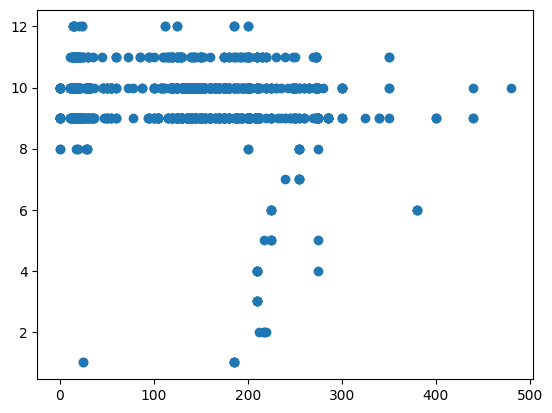

In [17]:
import matplotlib.pyplot as plt

price = new.Price
month = new.Month
plt.scatter(price, month)
plt.show()

Text(0, 0.5, 'Pumpkin Price')

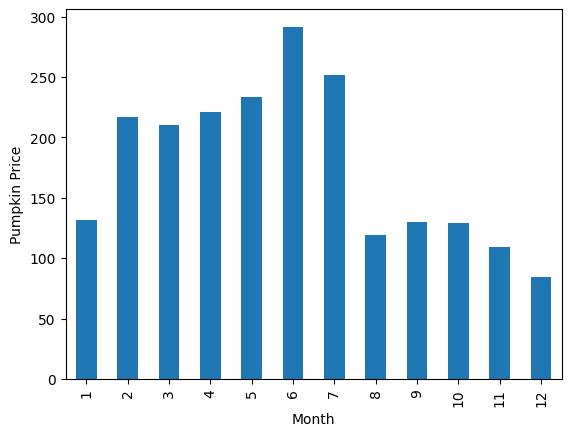

In [18]:
new.groupby(['Month'])['Price'].mean().plot(kind='bar')
plt.ylabel("Pumpkin Price")